In [1]:
import pandas as pd
import pyranges as pr
import upsetplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
h5 = '../cerberus_annot.h5'
filt_ab = '../cerberus_filtered_abundance.tsv'
feat = 'tss'
obs_source = 'lapa'
ref_sources = ['v40', 'v29']
support_sources = ['encode_cage',
                   'fantom_cage',
                   'encode_rampage']                   
support_label = 'CAGE, RAMPAGE'
ref = '../../../refs/cerberus/v40_transcript_metadata.tsv'

In [42]:
def plot_ends_per_ic(df, ca,
                     feat,
                     fname,
                     rm_monoexonic=True):
    """
    Plot a histogram of the # ends (tss or tes) per ic

    Parameters: 
        df (pandas DataFrame): DF where index is transcript
            id w/ triplet form
        feat (str): {'tss', 'tes'}
        fname (str): Output file name to save to
        
    Returns:
        temp (pandas DataFrame): DF w/ # ends / ic
    """
    
    # plot settings
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42
    sns.set_context('paper', font_scale=1.8)


    temp = df.copy(deep=True)
    feats = ['ic', feat]
    for feat in feats:
        temp = add_feat(temp, col='index', kind=feat)
    
    # keep only the relevant features and drop duplicated
    # combinations
    temp.reset_index(drop=True, inplace=True)
    temp = temp[[feat, 'ic']].copy(deep=True)
    temp.drop_duplicates(inplace=True)
    
    # groupby and count number of feature per ic
    temp = temp.groupby('ic').nunique().reset_index()
    
    # merge with novelty info from h5
    temp = temp.merge(ca.ic[['Name', 'Coordinates']],
                      how='left', left_on='ic', right_on='Name')
    
    if rm_monoexonic:
        temp = temp.loc[temp.Coordinates != '-']
    temp.drop(['Name', 'Coordinates'], axis=1, inplace=True)
    
    # plotting
    sns.set_context('paper', font_scale=1.8)    
    c_dict, order = get_end_colors()
    c = c_dict[feat]
    ax = sns.displot(temp, x=feat, kind='hist',
                     linewidth=0,
                     color=c, 
                     discrete=True,
                     alpha=1)

    ylabel = '# ICs'
    xlabel = '# {}s'.format(feat.upper())
    ax.fig.get_axes()[0].set_yscale('log')

    # _ = ax.set_yscale("log")

    _ = ax.set(xlabel=xlabel, ylabel=ylabel)
    # plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.savefig(fname, dpi=300)
    
    
    return temp

In [27]:
ca = cerberus.read(h5)

## For detected transcripts

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1789: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1788: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 234040
# isos >= 1 tpm: 212911
Applying gene type and novelty subset
Number of isos reported: 209476


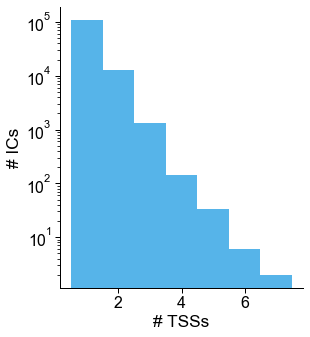

In [43]:
# get detected transcripts
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=1,
               gene_subset='polya',
               h5=h5)
feat = 'tss'
fname = 'figures/tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1789: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1788: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 234040
# isos >= 1 tpm: 212911
Applying gene type and novelty subset
Number of isos reported: 209476


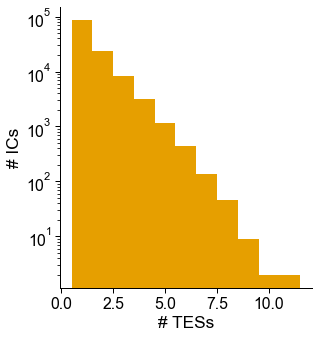

In [36]:
# get detected transcripts
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=1,
               gene_subset='polya',
               h5=h5)
feat = 'tes'
fname = 'figures/tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

## For gencode transcripts (polya)

In [37]:
df = pd.read_csv(ref, sep='\t')

# only polya
polya_cats = ['protein_coding', 'lncRNA', 'pseudogene']
df = df.loc[df.biotype_category.isin(polya_cats)]

print(df.biotype_category.unique())

df.set_index('tid', inplace=True)

['protein_coding' 'pseudogene' 'lncRNA']


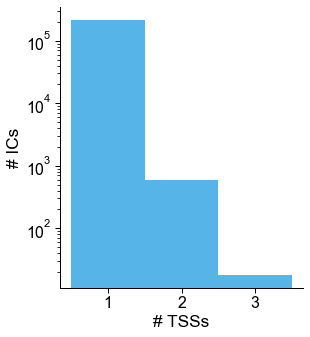

In [38]:
feat = 'tss'
fname = 'figures/v40_tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

In [39]:
temp.loc[temp[feat] == temp[feat].max()]
# temp.loc[temp[feat] == 5]
# temp.loc[temp[feat] == 4]

,ic,tss
55960,ENSG00000122644_1,3
60265,ENSG00000126453_1,3
79062,ENSG00000138835_11,3
89164,ENSG00000146112_1,3
96119,ENSG00000152795_1,3
129319,ENSG00000174227_22,3
131311,ENSG00000175611_4,3
160601,ENSG00000205853_1,3
175843,ENSG00000229116_1,3
181780,ENSG00000232931_1,3


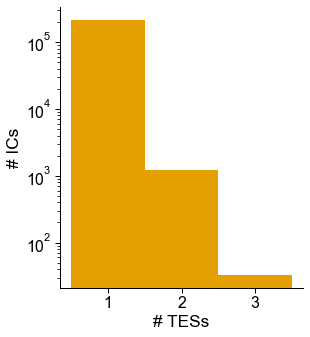

In [40]:
feat = 'tes'
fname = 'figures/v40_tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

In [41]:
temp.loc[temp[feat] == temp[feat].max()]
# temp.loc[temp[feat] == 5]
# temp.loc[temp[feat] == 4]

,ic,tes
10023,ENSG00000063978_5,3
24507,ENSG00000099622_1,3
80348,ENSG00000140044_1,3
85960,ENSG00000143761_2,3
87498,ENSG00000144810_1,3
131311,ENSG00000175611_4,3
133155,ENSG00000177302_1,3
133266,ENSG00000177374_1,3
140209,ENSG00000183150_1,3
153032,ENSG00000197471_1,3


In [ ]:
# yo what is going on w/ cacna1a
# oh they're all monoexonic

ca = cerberus.read('cerberus_annot_triplets.h5')
df = ca.triplets.copy(deep=True)
df = df.loc[df.source.isin(['obs_det', 'v40'])]


FileNotFoundError: File cerberus_annot_triplets.h5 does not exist

In [ ]:
df.loc[df.gid == 'ENSG00000141837']

In [ ]:
ca.ic.loc[ca.ic.Name == 'ENSG00000141837_17']

In [ ]:
ca.ic.novelty.unique()